<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Loading-and-cleaning-the-data" data-toc-modified-id="Loading-and-cleaning-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading and cleaning the data</a></span></li><li><span><a href="#Creating-the-clusters" data-toc-modified-id="Creating-the-clusters-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Creating the clusters</a></span><ul class="toc-item"><li><span><a href="#Word2Vec-with-simple-clustering" data-toc-modified-id="Word2Vec-with-simple-clustering-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Word2Vec with simple clustering</a></span></li><li><span><a href="#Word2Vec-with-subclustering" data-toc-modified-id="Word2Vec-with-subclustering-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Word2Vec with subclustering</a></span><ul class="toc-item"><li><span><a href="#First-clustering" data-toc-modified-id="First-clustering-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>First clustering</a></span></li><li><span><a href="#Second-and-third-clustering" data-toc-modified-id="Second-and-third-clustering-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Second and third clustering</a></span></li></ul></li><li><span><a href="#TFIDF" data-toc-modified-id="TFIDF-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>TFIDF</a></span></li></ul></li><li><span><a href="#Creating-word-clouds" data-toc-modified-id="Creating-word-clouds-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Creating word clouds</a></span></li><li><span><a href="#Interactive-clicking" data-toc-modified-id="Interactive-clicking-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Interactive clicking</a></span></li><li><span><a href="#Additional-questions" data-toc-modified-id="Additional-questions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Additional questions</a></span></li></ul></div>

# Solution to the assignment

## Imports

In [1]:
import pandas as pd
import numpy as np
import collections

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Loading and cleaning the data

In [3]:
df=pd.read_json('posts_with_topics.json', dtype=False)
df.head()

,postId,topics
0,219012311450917_1925315777487220,"[Politics, International relations, Donald Tru..."
1,219012311450917_1946787238673407,"[Politics, Donald Trump, Political career of D..."
2,219012311450917_1963988873619910,"[Politics, Donald Trump, Political career of D..."
3,219012311450917_1968369419848522,"[Politics, Government, Donald Trump, Political..."
4,219012311450917_1964447656907365,"[Politics, Donald Trump, Political career of D..."


In [4]:
#cleaning the errors in words
for i in range(len(df['topics'])):
    df['topics'][i] = [w.replace('â€“', '-') for w in df['topics'][i]]
   

In [5]:
#creating set of all topics and their counts
set_of_topics=set()
counter=collections.Counter()

for x in df['topics']:
    set_of_topics=set_of_topics.union(x)
    counter.update(x)



In [6]:
frequencies=pd.DataFrame(counter.most_common(), columns=['Word', 'Frequency'])

## Creating the clusters

In [7]:
from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score
from sklearn import cluster
from sklearn import metrics

### Word2Vec with simple clustering

In [8]:
sentences = df['topics']
model = Word2Vec(sentences, min_count=1)

In [9]:
vectors=pd.DataFrame(zip(list(model.wv.vocab), model[model.wv.vocab]), columns=['Word','Vector_representation'])
lexicon=vectors.merge(frequencies, how='left', on='Word')
lexicon['Cluster_0']=0


In [10]:
n_clusters=[2,3,4]
for i in n_clusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(list(lexicon['Vector_representation'].apply(lambda x: np.array(x))))
 
    labels = kmeans.labels_
    #centroids = kmeans.cluster_centers_
    
    lexicon['Cluster_'+str(i-1)]=labels    

### Word2Vec with subclustering

#### First clustering

In [11]:
#n_clusters=2
#kmeans = cluster.KMeans(n_clusters=n_clusters)
#kmeans.fit(list(lexicon['Vector_representation'].apply(lambda x: np.array(x))))
# 
#labels = kmeans.labels_
#centroids = kmeans.cluster_centers_

In [12]:
#lexicon['Cluster_0']=0
#lexicon['Cluster_1']=labels

#### Second and third clustering

In [13]:
#def cluster_again(lexicon,cluster_orig, cluster_new):
#    list_=[]
#    for i in np.unique(lexicon[cluster_orig]):
#        data=lexicon[lexicon[cluster_orig]==i]
#        kmeans = cluster.KMeans(n_clusters=n_clusters)
#        kmeans.fit(list(data['Vector_representation'].apply(lambda x: np.array(x))))
#     
#        labels = kmeans.labels_
#        data[cluster_new]=labels+n_clusters*i
#        list_.append(data[['Word', cluster_new]])
#        del data
#    
#    lexicon=lexicon.merge(pd.concat(list_), how='left', on='Word')
#    return lexicon

In [14]:
#lexicon=cluster_again(lexicon, 'Cluster_1', 'Cluster_2')
#lexicon=cluster_again(lexicon, 'Cluster_2', 'Cluster_3')

### TFIDF

In [15]:
#corpus=[]
#for i in range(len(df['topics'])):
#          corpus=corpus+[" ".join([x.replace('(','xx').replace(')','xxx').replace(' ', '_').replace('-','__') for x in df['topics'][i]])]

In [16]:
#vectorizer = TfidfVectorizer(lowercase=False)
#X = vectorizer.fit_transform(corpus)

In [17]:
#true_k = 2
#kmeans = cluster.KMeans(n_clusters=true_k, max_iter=100, n_init=1)
#model=kmeans.fit(X)
#
#terms= [x.replace('xx','(').replace('xxx', ')').replace('__','-').replace('_', ' ') for x in vectorizer.get_feature_names()]
#labels=model.predict(X)
#
#
#lexicon=pd.DataFrame(zip(terms,labels), columns=['Word','Cluster_1'])
#lexicon=lexicon.merge(frequencies, how='left', on='Word')
#lexicon['Cluster_0']=0
#lexicon['Frequency']=lexicon['Frequency'].fillna(12)

In [18]:
#for true_k in [3,4]:
#    kmeans = cluster.KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
#    model=kmeans.fit(X)
#    
#    terms= [x.replace(';;','(').replace(';;;', ')').replace('__','-').replace('_', ' ') for x in vectorizer.get_feature_names()]
#    labels=model.predict(X)
#    
#    new_cluster=pd.DataFrame(zip(terms,labels), columns=['Word','Cluster_'+str(true_k-1)])[0:110]
#    lexicon=lexicon.merge(new_cluster, how='left', on='Word')
#

## Creating word clouds

In [19]:
class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)
class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)
    
color_to_words = {
    'green': list(lexicon[lexicon['Cluster_3']==0]['Word']),
    'yellow': list(lexicon[lexicon['Cluster_3']==1]['Word']),
    'blue':list(lexicon[lexicon['Cluster_3']==2]['Word']),
    'red':list(lexicon[lexicon['Cluster_3']==3]['Word'])}
        
default_color='grey'    
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

In [20]:
def create_wordcloud(cluster_name,n_components, savefig_name, height, width, max_words, plt_show):
    plt.figure(figsize=(50,150))
    j = np.ceil(n_components/4)
    for t in range(n_components):
        i=t+1
        plt.subplot(j, 4, i)
        wc = WordCloud(prefer_horizontal=1,height=height, width=width,max_font_size=50, max_words=max_words, background_color="white").generate_from_frequencies(dict(zip(lexicon[lexicon[cluster_name]==i-1]['Word'], lexicon[lexicon[cluster_name]==i-1]['Frequency']/sum(lexicon[lexicon[cluster_name]==i-1]['Frequency']))))
       

        # Apply our color function
        wc.recolor(color_func=grouped_color_func)

        plt.plot(figsize=(30,45))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")

    plt.savefig(savefig_name,bbox_inches='tight')
    if plt_show==1:
        plt.show()
        return
    else:
        return

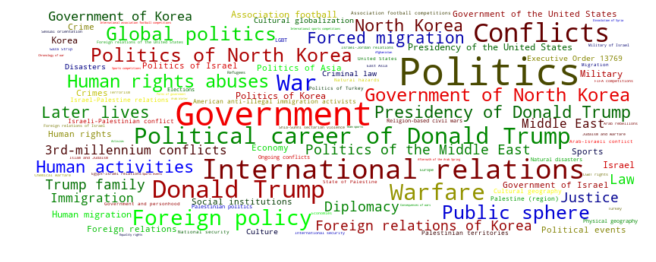

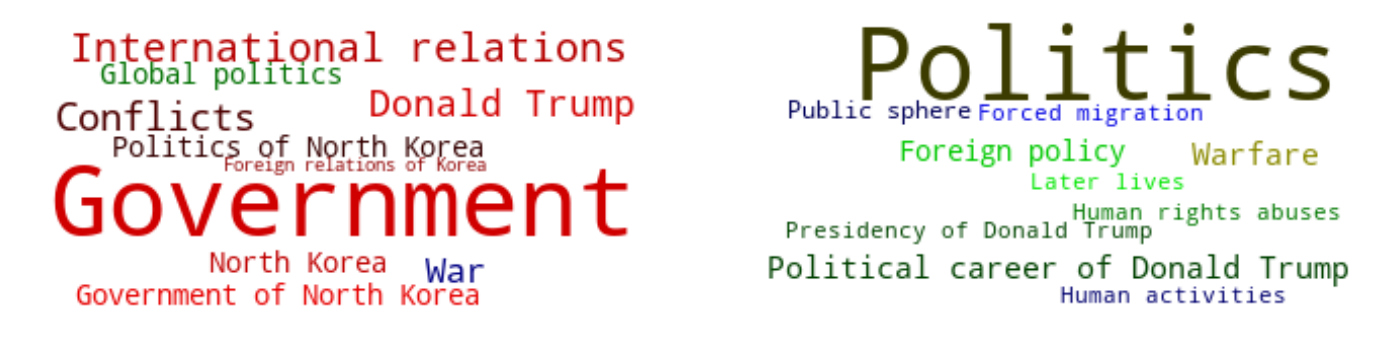

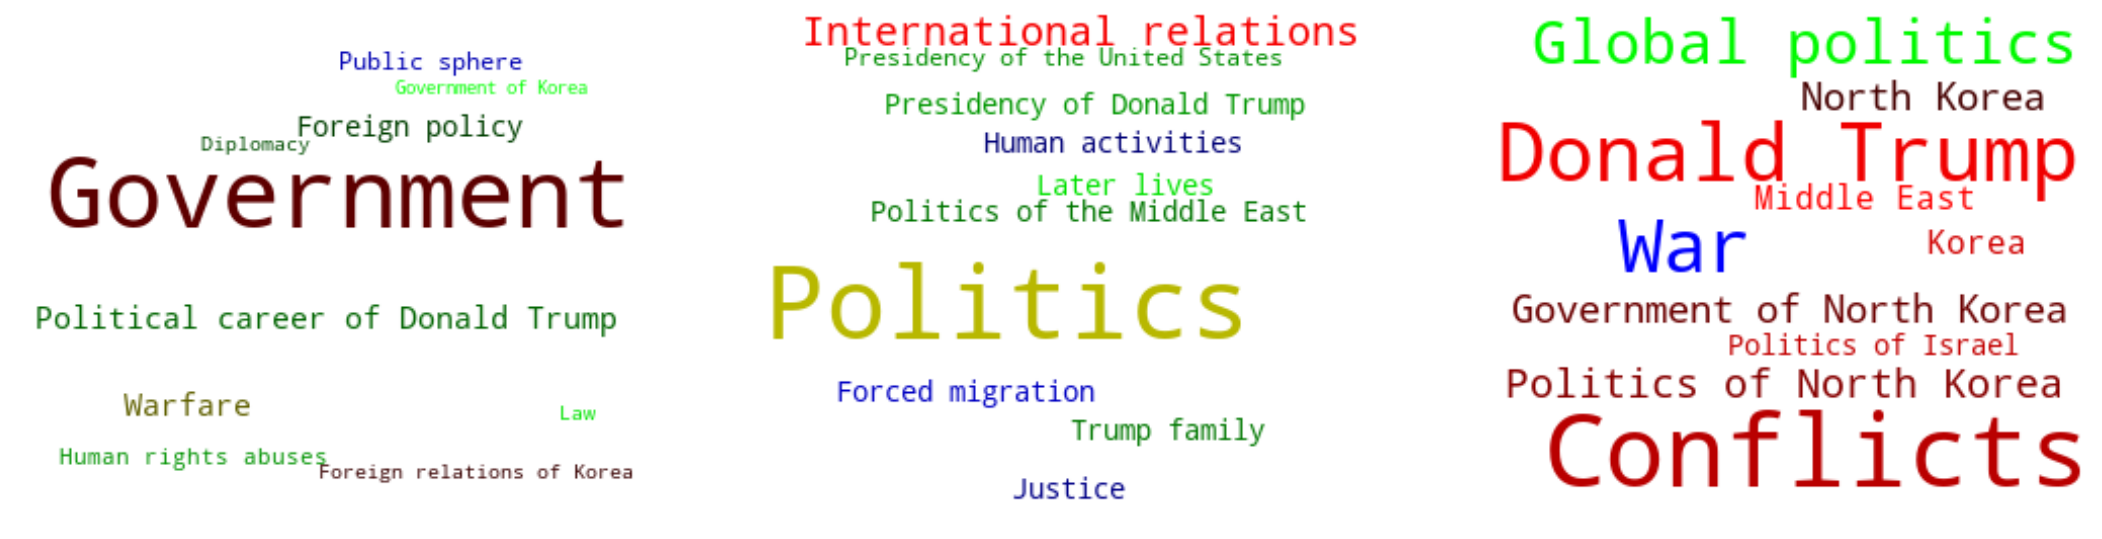

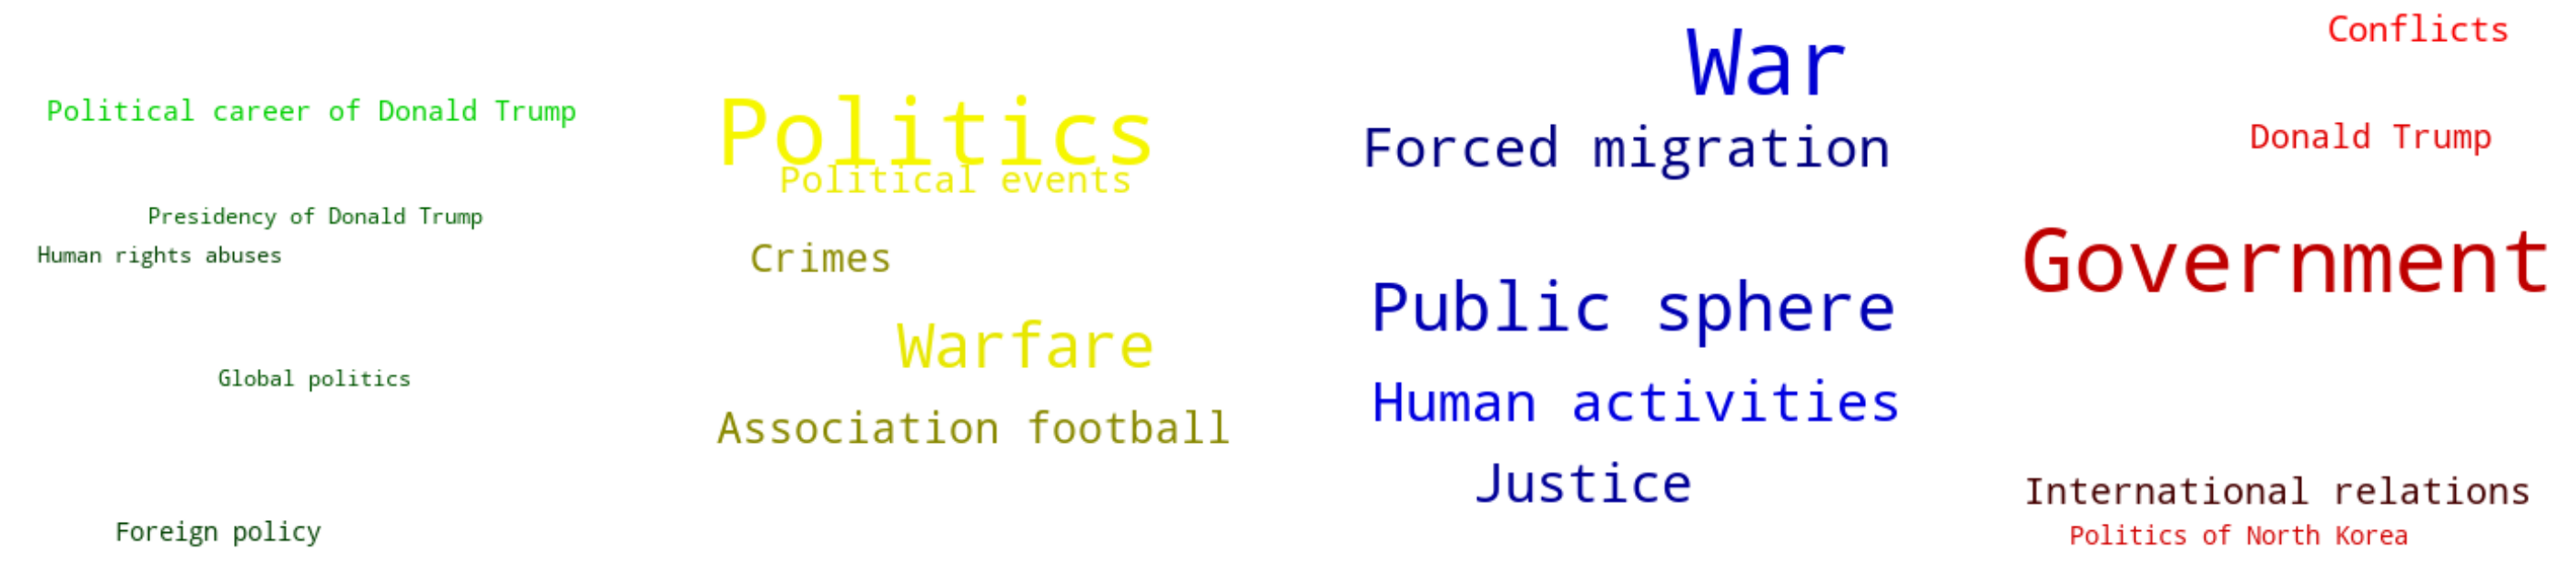

In [21]:
create_wordcloud('Cluster_0', 1, 'test0.png', 300, 800, max_words=110, plt_show=1)
create_wordcloud('Cluster_1', 2, 'test1.png', 150,300, max_words=10, plt_show=1)
create_wordcloud('Cluster_2', 3, 'test2.png', 250,300, max_words=10, plt_show=1)
create_wordcloud('Cluster_3', 4, 'test3.png', 300, 300, max_words=5, plt_show=1)

## Interactive clicking

In [22]:
from IPython.display import display, clear_output, Image
import ipywidgets as widgets

In [23]:
number_of_images=4
list_of_images=[Image("test"+str(i)+".png") for i in range(number_of_images)]

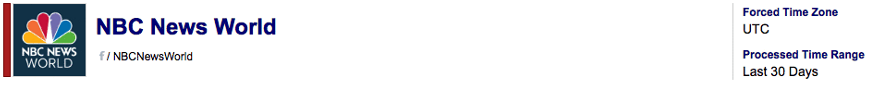

Button(description='Next frame', style=ButtonStyle())

Output()

In [24]:
%matplotlib inline
button = widgets.Button(description="Next frame")
out = widgets.Output()
with out:
    display(list_of_images[0])

i=1
display(Image('LOGO.png'))

def on_button_clicked(b):
    global i
    with out:
        clear_output(True)
        display(list_of_images[i%number_of_images])
        i+=1

button.on_click(on_button_clicked)

display(button)
out

## Additional questions